In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from package import euklid as eu


In [2]:
path ="../gold.csv"

In [3]:
yahoo_df = pd.read_csv('gold.csv')

In [4]:
# Add indicators
yahoo_df['vwap'] = eu.vwap(yahoo_df['Close'], yahoo_df['Volume'])
yahoo_df['SO'] = eu.Stochastic_Oscillator(yahoo_df['Close'])
yahoo_df['RSI'] = eu.rsi(yahoo_df['Close'],14)
eu.macd(yahoo_df,yahoo_df['Close'])

# Select valid data
yahoo_df = yahoo_df[35:]

C:\Users\valer\OneDrive\Desktop\GitHub Projects\LSTM-for-FTSF\package\euklid.py:18: RuntimeWarning: invalid value encountered in double_scalars
  ind = np.sum(pvol)/np.sum(volume[low_range:(i+1)])


# Normalize

In [5]:
days_ahead = 1
differenced = yahoo_df['Close'] - yahoo_df['Close'].shift(days_ahead)[days_ahead:]
previous_differenced = differenced.shift(1)
yahoo_df["Previous_differenced"] = previous_differenced
yahoo_df["Differenced"] = differenced
yahoo_df = yahoo_df[days_ahead+1:]
yahoo_df.head()

<ipython-input-5-a402d1ae899a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df["Previous_differenced"] = previous_differenced
<ipython-input-5-a402d1ae899a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df["Differenced"] = differenced


,Date,Adj Close,Close,High,Low,Open,Volume,SO,RSI,vwap,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,Previous_differenced,Differenced
37,2000-10-23,270.100006,270.100006,271.700012,270.100006,271.700012,1.0,11.267854,55.915284,271.251243,-0.759455,-0.048197,-0.711259,1.100006,-1.100006
38,2000-10-24,270.100006,270.100006,270.100006,269.799988,269.799988,16.0,11.267854,55.915284,271.008931,-0.797008,-0.068599,-0.728408,-1.100006,0.000000
39,2000-10-25,266.200012,266.200012,267.100006,266.000000,266.200012,20.0,0.000000,47.708551,270.278518,-1.128457,-0.320039,-0.808418,0.000000,-3.899994
40,2000-10-26,264.899994,264.899994,267.000000,264.899994,266.000000,0.0,0.000000,45.332279,270.261745,-1.478985,-0.536454,-0.942532,-3.899994,-1.300018
41,2000-10-27,264.399994,264.399994,265.500000,264.399994,265.500000,1.0,0.000000,44.420546,270.227199,-1.776647,-0.667292,-1.109355,-1.300018,-0.500000


In [6]:
# Try to make predictions on up or down
# def up_down(price):
#     up_down = [np.nan]
#     for i in range(1,len(price)):
#         if price[i] > price[i-1]:
#             up_down.append(1)
#         else:
#             up_down.append(0)
#     return up_down
# yahoo_df['up_down'] = up_down(list(yahoo_df['Close']))
# yahoo_df

In [7]:
# price = yahoo_df['Differenced'] 
# price.plot()

In [8]:
#yahoo_df = yahoo_df.iloc[days_ahead:,:]
yahoo_df = yahoo_df.drop(columns = ['Volume', 'vwap']) #'KAMA','OBV','T3'])
close = yahoo_df['Close']
yahoo_df = yahoo_df.iloc[:,6:-1].shift(-1)
yahoo_df = yahoo_df.iloc[:-1,:]

In [9]:
yahoo_df.values

array([[ 1.12678538e+01,  5.59152840e+01, -7.97007743e-01,
        -6.85993369e-02, -7.28408407e-01, -1.10000610e+00],
       [ 0.00000000e+00,  4.77085508e+01, -1.12845722e+00,
        -3.20039048e-01, -8.08418168e-01,  0.00000000e+00],
       [ 0.00000000e+00,  4.53322790e+01, -1.47898510e+00,
        -5.36453549e-01, -9.42531556e-01, -3.89999390e+00],
       ...,
       [ 7.41887627e+01,  5.69103228e+01,  2.60802112e+00,
         9.29225178e-01,  1.67879594e+00,  6.00000000e+00],
       [ 7.56636905e+01,  5.71882894e+01,  3.93723444e+00,
         1.80675080e+00,  2.13048364e+00,  8.59997559e+00],
       [ 8.24485027e+01,  5.85075152e+01,  5.30073148e+00,
         2.53619827e+00,  2.76453321e+00,  1.00000000e+00]])

In [10]:
# convert series to supervised learning
values = yahoo_df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
values

array([[ 1.1267854e+01,  5.5915283e+01, -7.9700774e-01, -6.8599336e-02,
        -7.2840840e-01, -1.1000061e+00],
       [ 0.0000000e+00,  4.7708549e+01, -1.1284572e+00, -3.2003903e-01,
        -8.0841815e-01,  0.0000000e+00],
       [ 0.0000000e+00,  4.5332279e+01, -1.4789851e+00, -5.3645355e-01,
        -9.4253153e-01, -3.8999939e+00],
       ...,
       [ 7.4188766e+01,  5.6910324e+01,  2.6080210e+00,  9.2922521e-01,
         1.6787959e+00,  6.0000000e+00],
       [ 7.5663689e+01,  5.7188290e+01,  3.9372344e+00,  1.8067508e+00,
         2.1304836e+00,  8.5999756e+00],
       [ 8.2448502e+01,  5.8507515e+01,  5.3007317e+00,  2.5361984e+00,
         2.7645333e+00,  1.0000000e+00]], dtype=float32)

# Train, test, val

In [11]:
# split into train and test sets
n_train_days = int(round(yahoo_df.shape[0]*0.8))

In [12]:
train = values[:n_train_days, :]
test = values[n_train_days:, :]
close_train = list(close)[:n_train_days]
close_test = list(close)[n_train_days:]

In [13]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]


In [14]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4276, 1, 5) (4276,) (1069, 1, 5) (1069,)


# LSTM

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [16]:
# Set early stopping monitor so the model stops training when it won't improve anymore
esm = EarlyStopping(monitor = 'loss', patience = 7)

# Set the optimizer
adam = tf.optimizers.Adam(learning_rate = 0.0001)

Epoch 1/500
43/43 - 1s - loss: 7.5769 - 1s/epoch - 31ms/step
Epoch 2/500
43/43 - 0s - loss: 7.5384 - 60ms/epoch - 1ms/step
Epoch 3/500
43/43 - 0s - loss: 7.5025 - 58ms/epoch - 1ms/step
Epoch 4/500
43/43 - 0s - loss: 7.4689 - 64ms/epoch - 1ms/step
Epoch 5/500
43/43 - 0s - loss: 7.4382 - 61ms/epoch - 1ms/step
Epoch 6/500
43/43 - 0s - loss: 7.4101 - 60ms/epoch - 1ms/step
Epoch 7/500
43/43 - 0s - loss: 7.3891 - 62ms/epoch - 1ms/step
Epoch 8/500
43/43 - 0s - loss: 7.3749 - 63ms/epoch - 1ms/step
Epoch 9/500
43/43 - 0s - loss: 7.3645 - 63ms/epoch - 1ms/step
Epoch 10/500
43/43 - 0s - loss: 7.3567 - 56ms/epoch - 1ms/step
Epoch 11/500
43/43 - 0s - loss: 7.3502 - 57ms/epoch - 1ms/step
Epoch 12/500
43/43 - 0s - loss: 7.3442 - 77ms/epoch - 2ms/step
Epoch 13/500
43/43 - 0s - loss: 7.3389 - 59ms/epoch - 1ms/step
Epoch 14/500
43/43 - 0s - loss: 7.3341 - 60ms/epoch - 1ms/step
Epoch 15/500
43/43 - 0s - loss: 7.3300 - 59ms/epoch - 1ms/step
Epoch 16/500
43/43 - 0s - loss: 7.3263 - 57ms/epoch - 1ms/step
Ep

Epoch 131/500
43/43 - 0s - loss: 7.1872 - 62ms/epoch - 1ms/step
Epoch 132/500
43/43 - 0s - loss: 7.1867 - 61ms/epoch - 1ms/step
Epoch 133/500
43/43 - 0s - loss: 7.1860 - 62ms/epoch - 1ms/step
Epoch 134/500
43/43 - 0s - loss: 7.1853 - 59ms/epoch - 1ms/step
Epoch 135/500
43/43 - 0s - loss: 7.1849 - 57ms/epoch - 1ms/step
Epoch 136/500
43/43 - 0s - loss: 7.1843 - 77ms/epoch - 2ms/step
Epoch 137/500
43/43 - 0s - loss: 7.1837 - 63ms/epoch - 1ms/step
Epoch 138/500
43/43 - 0s - loss: 7.1831 - 54ms/epoch - 1ms/step
Epoch 139/500
43/43 - 0s - loss: 7.1827 - 58ms/epoch - 1ms/step
Epoch 140/500
43/43 - 0s - loss: 7.1821 - 65ms/epoch - 2ms/step
Epoch 141/500
43/43 - 0s - loss: 7.1816 - 60ms/epoch - 1ms/step
Epoch 142/500
43/43 - 0s - loss: 7.1810 - 64ms/epoch - 1ms/step
Epoch 143/500
43/43 - 0s - loss: 7.1805 - 64ms/epoch - 1ms/step
Epoch 144/500
43/43 - 0s - loss: 7.1800 - 62ms/epoch - 1ms/step
Epoch 145/500
43/43 - 0s - loss: 7.1795 - 60ms/epoch - 1ms/step
Epoch 146/500
43/43 - 0s - loss: 7.1789 

43/43 - 0s - loss: 7.1285 - 61ms/epoch - 1ms/step
Epoch 260/500
43/43 - 0s - loss: 7.1281 - 56ms/epoch - 1ms/step
Epoch 261/500
43/43 - 0s - loss: 7.1277 - 60ms/epoch - 1ms/step
Epoch 262/500
43/43 - 0s - loss: 7.1273 - 59ms/epoch - 1ms/step
Epoch 263/500
43/43 - 0s - loss: 7.1269 - 67ms/epoch - 2ms/step
Epoch 264/500
43/43 - 0s - loss: 7.1264 - 61ms/epoch - 1ms/step
Epoch 265/500
43/43 - 0s - loss: 7.1262 - 56ms/epoch - 1ms/step
Epoch 266/500
43/43 - 0s - loss: 7.1256 - 57ms/epoch - 1ms/step
Epoch 267/500
43/43 - 0s - loss: 7.1253 - 57ms/epoch - 1ms/step
Epoch 268/500
43/43 - 0s - loss: 7.1249 - 59ms/epoch - 1ms/step
Epoch 269/500
43/43 - 0s - loss: 7.1245 - 58ms/epoch - 1ms/step
Epoch 270/500
43/43 - 0s - loss: 7.1241 - 69ms/epoch - 2ms/step
Epoch 271/500
43/43 - 0s - loss: 7.1237 - 73ms/epoch - 2ms/step
Epoch 272/500
43/43 - 0s - loss: 7.1232 - 64ms/epoch - 1ms/step
Epoch 273/500
43/43 - 0s - loss: 7.1229 - 62ms/epoch - 1ms/step
Epoch 274/500
43/43 - 0s - loss: 7.1224 - 61ms/epoch -

Epoch 388/500
43/43 - 0s - loss: 7.0867 - 68ms/epoch - 2ms/step
Epoch 389/500
43/43 - 0s - loss: 7.0865 - 69ms/epoch - 2ms/step
Epoch 390/500
43/43 - 0s - loss: 7.0862 - 60ms/epoch - 1ms/step
Epoch 391/500
43/43 - 0s - loss: 7.0861 - 63ms/epoch - 1ms/step
Epoch 392/500
43/43 - 0s - loss: 7.0858 - 62ms/epoch - 1ms/step
Epoch 393/500
43/43 - 0s - loss: 7.0855 - 61ms/epoch - 1ms/step
Epoch 394/500
43/43 - 0s - loss: 7.0854 - 62ms/epoch - 1ms/step
Epoch 395/500
43/43 - 0s - loss: 7.0852 - 60ms/epoch - 1ms/step
Epoch 396/500
43/43 - 0s - loss: 7.0848 - 75ms/epoch - 2ms/step
Epoch 397/500
43/43 - 0s - loss: 7.0849 - 64ms/epoch - 1ms/step
Epoch 398/500
43/43 - 0s - loss: 7.0845 - 64ms/epoch - 1ms/step
Epoch 399/500
43/43 - 0s - loss: 7.0841 - 57ms/epoch - 1ms/step
Epoch 400/500
43/43 - 0s - loss: 7.0840 - 60ms/epoch - 1ms/step
Epoch 401/500
43/43 - 0s - loss: 7.0841 - 59ms/epoch - 1ms/step
Epoch 402/500
43/43 - 0s - loss: 7.0837 - 65ms/epoch - 2ms/step
Epoch 403/500
43/43 - 0s - loss: 7.0832 

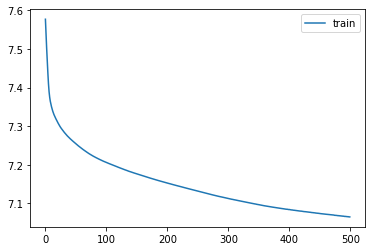

In [17]:
# design network
model = Sequential()
model.add(LSTM(75, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer=adam)
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=100, verbose=2, shuffle=False,  callbacks = [esm])
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Prediction 

In [18]:
predict = model.predict(test_X)
predict = [float(predict[i]) for i in range(len(predict))]
predict[:10]

[1.2608238458633423,
 -0.8041093349456787,
 -0.4475473165512085,
 1.9201101064682007,
 -2.6330480575561523,
 -1.6280015707015991,
 1.4528611898422241,
 -0.11417624354362488,
 2.143343448638916,
 2.6369996070861816]

In [19]:
def ud_pred(pred, actual):
    up_down = [1]
    for i in range(1,len(pred)):
        if pred[i] > actual[i-1]:
            up_down.append(1)
        else:
            up_down.append(0)
    return up_down

def ud(predict):
    up_down = [1]
    for i in range(1,len(predict)):
        if predict[i] > predict[i-1]:
            up_down.append(1)
        else:
            up_down.append(0)
    return up_down

In [20]:
# Scale back predictions
def scale_back(pred, close):
    predict = [close[0]]
    for i in range(1,len(pred)):
        predict.append(pred[i]+list(close)[i-1])
    return predict

In [21]:
pred = scale_back(predict, close_test)

In [22]:
updown_pred = ud_pred(pred, close_test)

In [23]:
close_test[-2], pred[-1]

(1836.199951171875, 1837.346688747406)

In [24]:
df = pd.DataFrame(updown_pred)
df["Close"] = close_test[:-1]
df["updown_pred"] = df.iloc[:,0]
df["updown_actual"] = ud(close_test[:-1])
df["Scaled_pred"] = pred
df["Pred"] = predict
df = df.iloc[:,1:] 
print('Model Accuracy: ', (df["updown_pred"] == df["updown_actual"]).sum()/df.shape[0])
print('Baseline Accuracy: 0.5')
df.head()

Model Accuracy:  0.6061739943872778
Baseline Accuracy: 0.5


,Close,updown_pred,updown_actual,Scaled_pred,Pred
0,1277.300049,1,1,1277.300049,1.260824
1,1281.500000,0,1,1276.495939,-0.804109
2,1276.500000,0,0,1281.052453,-0.447547
3,1277.400024,1,1,1278.420110,1.920110
4,1295.800049,0,1,1274.766976,-2.633048


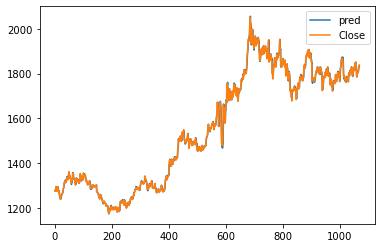

In [25]:
plt.plot(df['Scaled_pred'], label='pred')
plt.plot(df["Close"], label='Close')
plt.legend()
plt.show()

In [30]:
commission = 0.00
def long_equity(prediction, close):
    long = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] > close[i-1]:
            long.append(close[i] - close[i-1] - close[i-1]*commission)
        else:
            long.append(0)
    return long

def short_equity(prediction, close):
    short = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] < close[i-1]:
            short.append(close[i-1] - close[i] - close[i-1]*commission)
        else:
            short.append(0)
    return short  

def total_equity(prediction, close):
    total = [close[0]]
    for i in range(1,len(prediction)-1):
        if prediction[i] > close[i-1]:
            total.append(close[i] - close[i-1] - close[i-1]*commission)
        else:
            total.append(close[i-1] - close[i] - close[i-1]*commission)
    return total

# def percentage_returns(equity):
#     equity = 0
#     for i in range(1,len(equity))

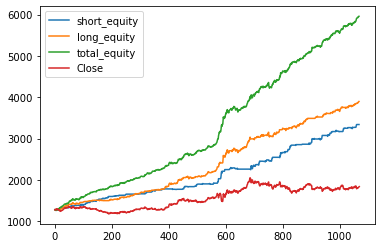

In [31]:
df_equity = pd.DataFrame()
df_equity["long_equity"] = long_equity(df["Scaled_pred"], df["Close"])
df_equity["short_equity"] = short_equity(df["Scaled_pred"], df["Close"])
df_equity["total_equity"] = total_equity(df["Scaled_pred"], df["Close"])
df_equity["short_equity"].cumsum().plot()
df_equity["long_equity"].cumsum().plot()
df_equity["total_equity"].cumsum().plot()
df["Close"].plot()
# df["Pred"].shift(-1).plot()
plt.legend()